## **Tory Smith**

In [552]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**1) Given the Earth orbiting spacecraft position and velocity vectors in Cartesian coordinates**

In [525]:
R=np.array([-2436.45, -2436.45, 6891.037]) #[km]
R_dot = np.array([5.088611, -5.088611, 0.0]) #[km/s]
mu = 398600.5 #[km^3/s^2]

In [526]:
h = np.cross(R, R_dot)
A = -1*(np.cross(h, R_dot) + mu*R/np.linalg.norm(R))
P = np.linalg.norm(h)**2/mu
n = np.cross(np.array([0, 0, 1]), h)
e = np.cross(R_dot/mu, h-R/np.linalg.norm(R))

In [527]:
#eccentricity
ecc = np.linalg.norm(A)/mu

In [528]:
#semi-major-axis
a = P/(1-ecc**2)

In [529]:
#inclination
inc = np.arccos(np.dot(h/np.linalg.norm(h), np.array([0, 0, 1])))

In [530]:
#right ascension of the ascending node
raan = np.arccos(np.dot(np.array([1, 0, 0]), n/np.linalg.norm(n)))

In [531]:
#argument of perigee
w = np.arccos(np.dot(n, e)/(np.linalg.norm(n)*np.linalg.norm(e)))

In [532]:
#true anamoly
nu = np.arccos(np.dot(R, e)/(np.linalg.norm(R)*np.linalg.norm(e)))

In [553]:
print("Semi-Major Axis:", a, "[km]", "Eccentricity:", ecc, "Inclination:", inc, "[rad]", "\nRAAN:", raan, "[rad]", "Argument of Perigee:", w,"[rad]", "True Anamoly:", nu, "[rad]")

Semi-Major Axis: 7712.184983762813 [km] Eccentricity: 0.0009994359212409886 Inclination: 1.1071322171865605 [rad] 
RAAN: 2.356194490192345 [rad] Argument of Perigee: 1.5707963267948966 [rad] True Anamoly: 1.80360998372462e-05 [rad]


**2)Convert the Keplerian elements from Problem 1 back to position and velocity**

In [534]:
p = a*(1-ecc**2)
r = p / (1 + ecc * np.cos(nu))

In [535]:
#rotation matrices
def c_zxz(gamma, theta, phi):
    z_phi = np.array([[np.cos(phi), np.sin(phi), 0], [-np.sin(phi), np.cos(phi), 0], [0, 0, 1]])
    x_theta = np.array([[1, 0, 0], [0, np.cos(theta), np.sin(theta)], [0, -np.sin(theta), np.cos(theta)]]) #ROT 1
    z_gamma = np.array([[np.cos(gamma), np.sin(gamma), 0], [-np.sin(gamma), np.cos(gamma), 0], [0, 0, 1]])# ROT 3
    return np.dot(np.dot(z_phi, x_theta), z_gamma)



In [536]:
phi = raan
gamma = inc
theta = w+nu
C = c_zxz(gamma, theta, phi)
print("Position Vector: ", r*C[:, 0])
print("Velocity Vector: ", np.sqrt(mu/p)*C[:, 2])

Position Vector:  [-2436.36211551 -2436.53788449  6891.03699888]
Velocity Vector:  [ 5.08353034e+00 -5.08353034e+00 -1.29665085e-04]


**3) Given the gravity potential function U = μ/R, solve for the two-body acceleration due to gravity - see attached derivation**

**4) Develop the necessary code to numerically integrate the equations of motion using the position and
velocity from Problem 1 as the initial conditions. Compute the future position and velocity at 20-
second intervals for two full orbits. Plot the magnitude of the position, velocity, and acceleration
as a function of time for two full orbits and provide the figure.**

Text(0, 0.5, 'Position Magnitude [km]')

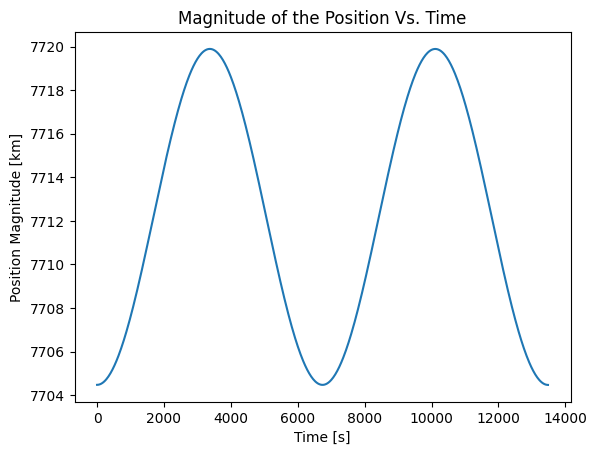

In [549]:
#calculate the period
period = 2*np.pi*np.sqrt(a**3/mu)
t = np.arange(0, period*2, 20)

R=np.array([-2436.45, -2436.45, 6891.037]) #[km]
R_dot = np.array([5.088611, -5.088611, 0.0]) #[km/s]

#equations of motion
def satellite_motion(y, t):
    mu = 398600.5 #[km^2/s^3]
    dydt = np.concatenate([y[3:6], -mu*y[0:3]/np.linalg.norm(y[0:3])**3])
    return dydt
#initial Conditions
y0 = np.concatenate([R, R_dot])

#numeric integration
sol = odeint(satellite_motion, y0, t)


plt.plot(t, [np.sqrt(sol[i, 0]**2 + sol[i, 1]**2 + sol[i, 2]**2) for i in range(len(t))])
plt.title('Magnitude of the Position Vs. Time')
plt.xlabel('Time [s]')
plt.ylabel('Position Magnitude [km]')


Text(0, 0.5, 'Velocity Magnitude [km/2]')

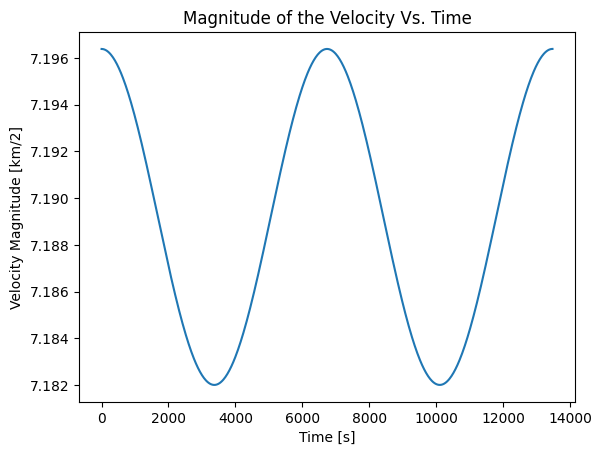

In [538]:
plt.plot(t, [np.linalg.norm(sol[i, 3:6]) for i in range(len(t))])
plt.title('Magnitude of the Velocity Vs. Time')
plt.xlabel('Time [s]')
plt.ylabel('Velocity Magnitude [km/2]')


Text(0, 0.5, 'Acceleration Magnitude [km/s^2]')

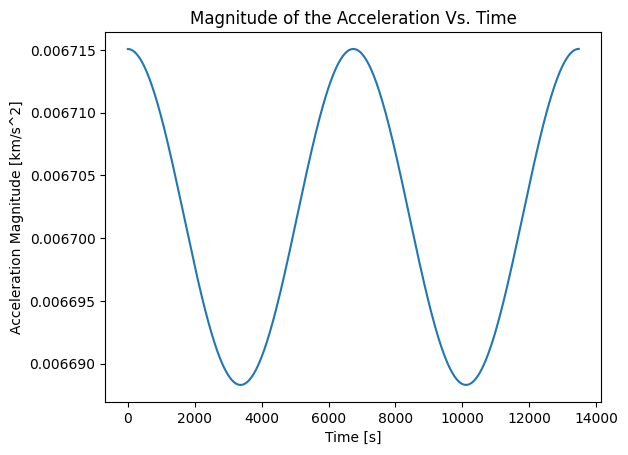

In [539]:
-mu*y[0:3]/np.linalg.norm(y[0:3])**3
plt.plot(t, [np.linalg.norm(-mu*sol[i, 0:3]/np.linalg.norm(sol[i, 0:3])**3) for i in range(len(t))])
plt.title('Magnitude of the Acceleration Vs. Time')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration Magnitude [km/s^2]')


**Compute the specific orbital angular
momentum vector for these two full orbits and plot that as well, as a function of time, as a 3D
scatter plot (h = R X V ). Assume that the motion is only due to the accelerations derived from
Eq(3)**

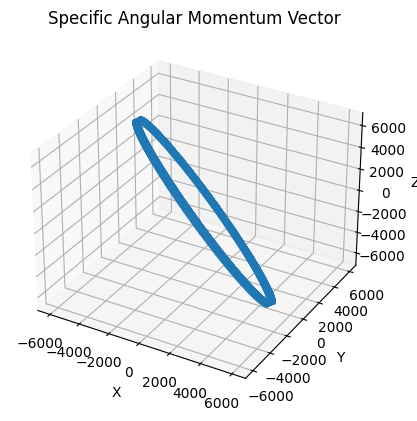

In [540]:

ax = plt.figure().add_subplot(projection='3d')
h = np.array([np.cross(sol[i, 0:3], sol[i, 3:6]) for i in range(len(t))])
ax.quiver(sol[0:len(t), 0], sol[0:len(t), 1], sol[0:len(t), 2], h[:, 0], h[:, 1], h[:, 2], normalize=True, length=500)
plt.title('Specific Angular Momentum Vector')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


**5) Compute the specific kinetic energy and specific potential energy (hint: Vis-Viva equation) as a function of time and plot the change in total specific energy to show that it remains constant over the two orbits. (i.e. plot dE = E(t) −E(t0)).**

(-0.1, 0.1)

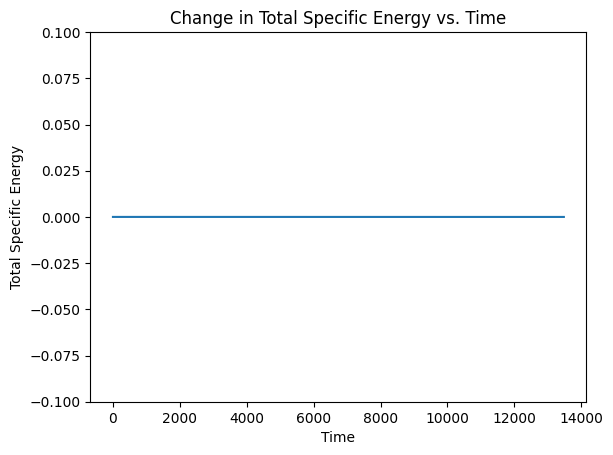

In [550]:
#calculate the total specific energy
def E(r, r_dot, mu):
    KE = np.dot(r_dot, r_dot)/2
    PE = mu/np.linalg.norm(r)
    return KE - PE 

#r from the numeric integration solver   
r = np.array([sol[0:len(t), 0], sol[0:len(t), 1], sol[0:len(t), 2]])
#r_dot from the numeric integration solver
r_dot = np.array([sol[0:len(t), 3], sol[0:len(t), 4], sol[0:len(t), 5]])

#change in total specific energy
dE = [E(r.T[i], r_dot.T[i], mu) for i in range(len(r.T))] - E(r.T[0], r_dot.T[0], mu)
plt.plot(t, dE)
plt.title('Change in Total Specific Energy vs. Time')
plt.xlabel('Time')
plt.ylabel('Total Specific Energy')
plt.ylim(-0.1, 0.1)

**Why is the change in total specific energy constant?**  
The total specific energy remains constant due to the law of conservation of energy. Slight errors in the values may be due to numeric integration.  